## HYPOTHESIS TESTING

##### Background:

Bombay hospitality Ltd. operates a franchise model for producing exotic Norwegian dinners throughout New England. The operating cost for a franchise in a week (W) is given by the equation W = $1,000 + $5X, where X represents the number of units produced in a week. Recent feedback from restaurant owners suggests that this cost model may no longer be accurate, as their observed weekly operating costs are higher.

##### Objective:

To investigate the restaurant owners' claim about the increase in weekly operating costs using hypothesis testing.

##### Data Provided:
The theoretical weekly operating cost model: W = $1,000 + $5X

Sample of 25 restaurants with a mean weekly cost of Rs. 3,050

Number of units produced in a week (X) follows a normal distribution with a mean (μ) of 600 units and a standard deviation (σ) of 25 units
ts


### SOLUTION

In [1]:
# Defining Hypothesis 
# H0: μ=1000+5×600=4000, Mean weekly cost is equal to the theoretical cost.
# H1: μ>4000, The mean weekly operating cost is greater than the theoretical cost

import pandas as pd
from scipy import stats
import numpy as np

# finding t-value
from math import sqrt
t = np.round((3050 - 4000)/((5 * 25)/sqrt(25)),4)
print("t-value = ",t)

# finding p-value
stats.t.cdf(t, df = 24)      # df: degrees of freedom = n-1
p = np.round(1-stats.t.cdf(t, df = 24), 4)   
print("p-value = ",p)

# Decision Making
if(p < 0.05):
    print("THE MEAN WEEKLY OPERATIONG COST IS GREATER THAN THE THE THEORETICAL COST")
else:
    print("MEAN WEEKLY COST IS EQUAL TO THE THEORETICAL COST")

t-value =  -38.0
p-value =  1.0
MEAN WEEKLY COST IS EQUAL TO THE THEORETICAL COST


## CHI-SQUARE TEST

#### Association between Device Type and Customer Satisfaction
##### Background:

Mizzare Corporation has collected data on customer satisfaction levels for two types of smart home devices: Smart Thermostats and Smart Lights.
They want to determine if there's a significant association between the type of device purchased and the customer's satisfaction level.
##### Data Provided:

The data is summarized in a contingency table showing the counts of customers in each satisfaction level for both types of devices:
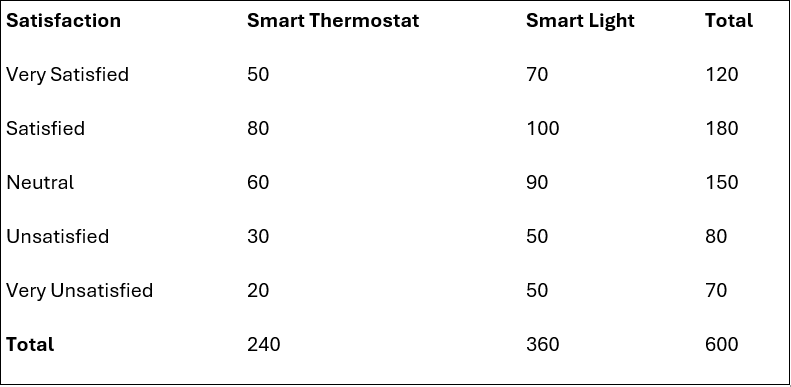
0	600

##### Objective:

To use the Chi-Square test for independence to determine if there's a significant association between the type of smart home device purchased (Smart Thermostats vs. Smart Lights) and the customer satisfaction level.


### SOLUTION

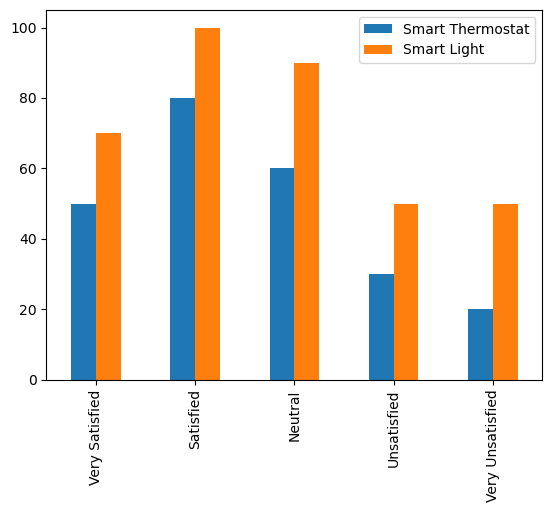

In [2]:
# Defining Hypothesis
# H0: There is no significant association between the type of smart home devices and the customer satisfaction levels.
#     The two variables are independent.
# H1: There is a significant association between the type of smart home device and customer satisfaction levels. 
#     The variables are not independent.


from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Given contingency table data
data = [[50,70],       # Very satisfied
        [80,100],      # Satisfied
        [60,90],       # Neutral
        [30,50],       # Unsatisfied
        [20,50]]       # Very Unsatisfied

df = pd.DataFrame(data,
                  index = ["Very Satisfied", "Satisfied", "Neutral", "Unsatisfied", "Very Unsatisfied"],     # row names
                  columns = ["Smart Thermostat", "Smart Light"])       # Column names


# Totals
row_totals = np.array([120, 180, 150, 80, 70])  # Row totals
col_totals = np.array([240, 360])               # Column totals
grand_total = 600                               # Grand total


df.plot(kind = 'bar',
       stacked = False)
plt.show()


In [3]:
# ChiSquare Statistics
chi2, p, dof, exp = chi2_contingency(data)

# p-value
p = np.round(p,4)
# test statisticcs, p-value, degrees of freedom, expected frequency
# p-value < 0.05,  reject null hypothesis (H0: both variables are indepedendent) and Accept Ha: Both variables are dependent


# Critical Value
from scipy.stats import chi2
alpha = 0.05
critical_value = np.round(chi2.ppf(1-alpha, dof),4)

print("p-value = ",p)
print("Critical value = ", critical_value)

# Decision Making:
if(p < 0.05):
    print("Reject H0.")
    print("There is no significant association between the type of smart home devices and the customer satisfaction levels.")
else:
    print("Accept H1.")
    print("There is a significant association between the type of smart home device and customer satisfaction levels.")

p-value =  0.2278
Critical value =  9.4877
Accept H1.
There is a significant association between the type of smart home device and customer satisfaction levels.
